In [421]:
import pandas as pd 
import os
import csv
import numpy as np 

directory= "../2020/csv/"
filename1 = "01.03.2020"
df = pd.read_csv("{}{}".format(directory,filename1), index_col = 0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

col = list(df.columns)
df["States"].at[7] = "J&K & Ladakh"
df_master = df[["States"]]

for filename in os.listdir(directory):
    
    df = pd.read_csv("{}{}".format(directory,filename), index_col= 0)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    maxDemandCol = filename
    col = list(df.columns)
    try:
        df = df.rename(columns={col[1]:maxDemandCol})
        df["States"].at[7] = "J&K & Ladakh"
        df = df[[maxDemandCol]]
    except:
        print(EnvironmentError)
        print(filename)
    df_master = pd.concat([df_master,df],axis=1, sort=False)
    
    

In [422]:
df=df_master.set_index("States")
df.append(df.sum().rename('All India'))
# df.columns = pd.to_datetime(df.columns)
df.columns = pd.to_datetime(df.columns, format='%d.%m.%Y')
colNames = list(df.columns)
colNames.sort()
frame = df.reindex(columns=colNames)
ds = df.sum()
frame.to_csv("../csv_2020.csv")



(array([737110., 737115., 737120., 737125., 737130., 737135., 737140.,
        737145., 737150., 737155., 737160., 737165., 737170., 737175.,
        737180., 737185., 737190., 737195., 737200., 737205., 737210.,
        737215., 737220., 737225., 737230., 737235., 737240., 737245.,
        737250.]),
 <a list of 29 Text major ticklabel objects>)

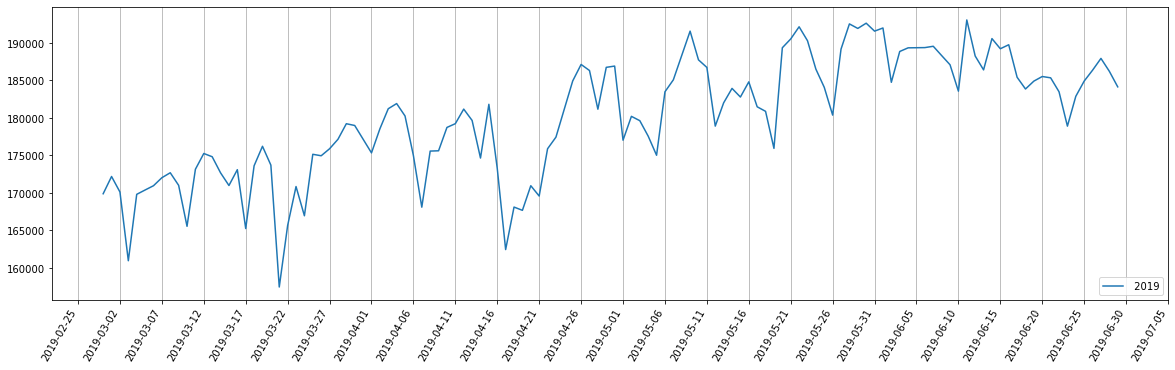

In [363]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MaxNLocator)

plt.figure(figsize=[20,6]); 
ax = ds.plot(); plt.legend([" 2019"], loc="lower right")
ax.xaxis.grid(True, which="major")
ax.xaxis.set_major_locator(MaxNLocator(30))
plt.xticks(rotation=60)

In [364]:
df

,2019-03-03,2019-05-31,2019-06-22,2019-05-25,2019-04-30,2019-06-16,2019-06-01,2019-03-23,2019-05-12,2019-06-12,...,2019-03-27,2019-06-21,2019-04-03,2019-04-23,2019-05-09,2019-05-17,2019-06-03,2019-04-01,2019-04-05,2019-04-24
States,,,,,,,,,,,,,,,,,,,,,
Punjab,4894,8640,11793,6723,6656,11325,8866,6110,7434,9234,...,6131,11451,6212,6233,8640,6285,9022,5898,6305,5547
Haryana,4893,8790,9125,7544,7954,8514,8972,5740,7750,8685,...,5904,8648,6447,7301,8790,7199,8893,6132,6408,7102
Rajasthan,11040,11528,11152,10667,10499,10566,11755,9860,9724,12251,...,10299,10708,10023,9808,11528,9602,11872,9783,9631,9788
Delhi,3743,6371,5910,5037,5634,6389,6386,3071,5438,6795,...,3409,5889,3741,4802,6371,4855,6526,3505,4218,5243
UP,12195,20903,19475,20397,19935,20220,21142,13967,19235,20771,...,14527,19175,16779,18371,20903,19050,21407,16608,17010,18890
Uttarakhand,1647,2155,2013,2091,1900,2014,2113,1622,1850,2022,...,1755,2063,1721,1868,2155,1992,2099,1603,1777,1922
HP,1534,1457,1423,1456,1364,1283,1452,1410,1274,1451,...,1503,1413,1382,1314,1457,1402,1612,1336,1356,1301
J&K & Ladakh,2312,2195,2068,2340,2212,2237,2062,2206,2321,2303,...,2178,2098,2200,2049,2195,2178,2181,2176,2239,1790
Chandigarh,182,327,282,214,256,283,332,170,356,322,...,185,277,186,222,327,225,348,170,200,244


In [423]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MaxNLocator,FormatStrFormatter,AutoMinorLocator)
import matplotlib.dates as mdates
import pandas as pd 
import datetime as dt

y20_new = []
y20 = pd.read_csv("../csv_2020.csv", index_col=0)
for i in y20.columns:
    i = i.replace("2020-","")
    y20_new.append(i) 

# y19 = pd.read_csv("../csv_2019.csv", index_col=0)

y19_new = []
y19 = pd.read_csv("../csv_2019.csv", index_col=0)
for i in y19.columns:
    i = i.replace("2019-","")
    y19_new.append(i) 

# idx = pd.MultiIndex.from_arrays([
#         pd.to_datetime(df.index.strftime('2012-%m-%d %H:%M:%S')),
#         df.index.year
#     ])

# ax = df.set_index(idx).unstack().speed.plot()
# lg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=2)


# df['month_year'] = pd.to_datetime(df['birth_date'])

# y20.columns = pd.DatetimeIndex(y20.columns).date
# y19.columns = pd.DatetimeIndex(y19.columns).date

y20.columns = pd.to_datetime(y20_new, format='%m-%d')
y19.columns = pd.to_datetime(y19_new, format='%m-%d')
# y20.columns = y20_new
# y19.columns = y19_new


sumy20 = y20.sum()
sumy19 = y19.sum()
print(sumy19)
print(sumy20)


1900-03-01    172193
1900-03-02    170126
1900-03-03    160963
1900-03-04    169815
1900-03-05    170394
               ...  
1900-06-25    184915
1900-06-26    186366
1900-06-27    187939
1900-06-28    186221
1900-06-29    184146
Length: 118, dtype: int64
1900-03-01    172040
1900-03-02    179256
1900-03-03    182393
1900-03-04    179619
1900-03-05    179427
               ...  
1900-06-19    178404
1900-06-20    178145
1900-06-21    169563
1900-06-22    175511
1900-06-23    178207
Length: 114, dtype: int64


(693652.0, 693781.0)

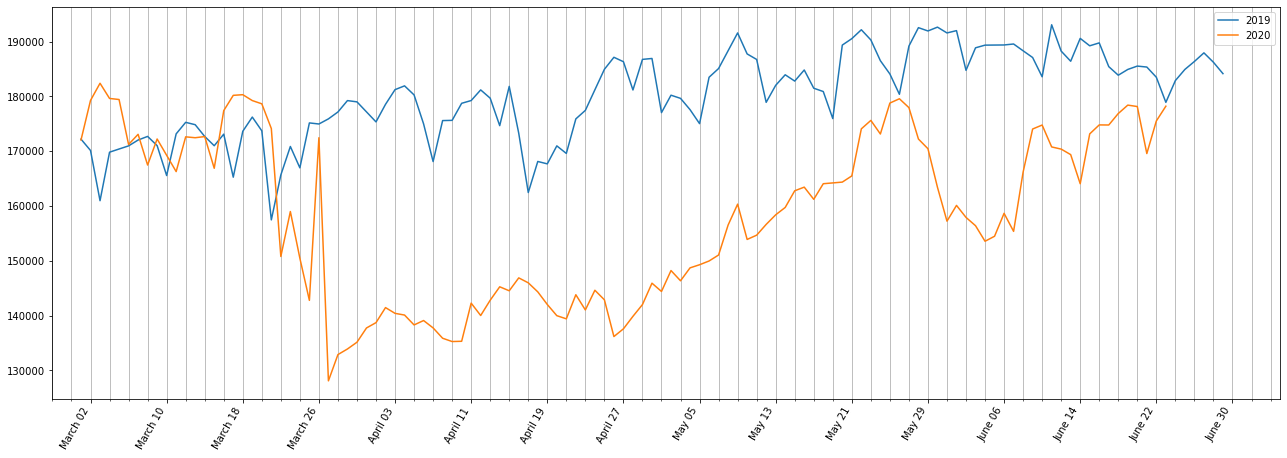

In [456]:

plt.figure(figsize=[22,8]); 
md_format = mdates.DateFormatter('%B %d')
# sumy19.plot()

# sumy20.plot()

ax = sumy19.plot()

sumy20.plot(ax = ax); 
plt.legend(["2019","2020"], loc="best")

ax.xaxis.grid(True, which="both")
ax.xaxis.set_major_formatter(md_format)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.xaxis.set_minor_locator(MaxNLocator(20*4))
plt.xticks(rotation=60)
plt.xlim(xmin=693652)
